 # Q1. 서울시 CCTV 설치 현황과 인구 수 데이터를 이용하여 데이터 분석 시각화 수행

In [60]:
#1. CCTV 데이터, 인구 데이터 파악하기
import pandas as pd

CCTV_Seoul = pd.read_csv('서울시CCTV설치운영현황(자치구)_년도별_210731기준.csv', skiprows = [0, 2],
                         encoding = 'CP949', thousands=',')
CCTV_Seoul.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
1,중 구,2333,16,114,87,77,236,240,372,386,155,361,289
2,용산구,2383,34,71,234,125,221,298,351,125,307,617,0
3,성동구,3602,448,125,212,105,339,310,874,390,262,461,76
4,광진구,2588,35,57,100,187,98,52,675,465,712,175,32


In [61]:
CCTV_Seoul.columns

Index(['구분', '총계', '2012년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년', '2021년'],
      dtype='object')

In [62]:
CCTV_Seoul.columns[0]

'구분'

In [63]:
CCTV_Seoul.rename(columns = {CCTV_Seoul.columns[0]: '자치구'}, inplace = True)
CCTV_Seoul.head()

,자치구,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
1,중 구,2333,16,114,87,77,236,240,372,386,155,361,289
2,용산구,2383,34,71,234,125,221,298,351,125,307,617,0
3,성동구,3602,448,125,212,105,339,310,874,390,262,461,76
4,광진구,2588,35,57,100,187,98,52,675,465,712,175,32


In [64]:
pop_Seoul = pd.read_excel('서울시주민등록인구통계_2021.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2021.3/4,합계,4421143,9765869,4739972,5025897,9542256,4636069,4906187,223613,103903,119710,2.16,1592339
3,2021.3/4,종로구,73652,154318,74561,79757,145512,70666,74846,8806,3895,4911,1.98,27776
4,2021.3/4,중구,63267,131943,64274,67669,122858,59853,63005,9085,4421,4664,1.94,24225


In [65]:
pop_Seoul = pd.read_excel('서울시주민등록인구통계_2021.xls', header = 2,
                         usecols = 'B, D, G, J, N')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,9765869,9542256,223613,1592339
1,종로구,154318,145512,8806,27776
2,중구,131943,122858,9085,24225
3,용산구,238300,224145,14155,38906
4,성동구,294140,287820,6320,46053


In [66]:
pop_Seoul.rename(columns = {pop_Seoul.columns[0]: '자치구',
                           pop_Seoul.columns[1]: '인구수',
                           pop_Seoul.columns[2]: '한국인',
                           pop_Seoul.columns[3]: '외국인',
                           pop_Seoul.columns[4]: '고령자'},
                inplace = True)
pop_Seoul.head()

,자치구,인구수,한국인,외국인,고령자
0,합계,9765869,9542256,223613,1592339
1,종로구,154318,145512,8806,27776
2,중구,131943,122858,9085,24225
3,용산구,238300,224145,14155,38906
4,성동구,294140,287820,6320,46053


In [67]:
CCTV_Seoul.shape

(25, 13)

In [68]:
CCTV_Seoul.dtypes

자치구         object
총계           int64
2012년 이전     int64
2012년        int64
2013년        int64
2014년        int64
2015년        int64
2016년        int64
2017년        int64
2018년        int64
2019년        int64
2020년        int64
2021년        int64
dtype: object

In [69]:
CCTV_Seoul.describe()

,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
count,25.0000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,3081.2800,306.680000,88.000000,139.640000,177.560000,263.280000,325.160000,397.880000,395.040000,478.44000,445.280000,64.320000
std,1063.2148,393.645115,71.336643,89.694797,153.166326,181.918599,260.103934,275.090337,208.503493,315.55072,258.230601,89.966531
min,1629.0000,0.000000,0.000000,0.000000,29.000000,79.000000,1.000000,6.000000,85.000000,9.00000,168.000000,0.000000
25%,2415.0000,35.000000,24.000000,77.000000,77.000000,141.000000,168.000000,196.000000,222.000000,274.00000,288.000000,3.000000
50%,2588.0000,83.000000,77.000000,106.000000,123.000000,209.000000,248.000000,351.000000,386.000000,358.00000,386.000000,32.000000
75%,3704.0000,448.000000,129.000000,193.000000,210.000000,329.000000,350.000000,506.000000,540.000000,712.00000,508.000000,101.000000
max,6502.0000,1413.000000,253.000000,349.000000,597.000000,840.000000,1310.000000,1060.000000,867.000000,1068.00000,1213.000000,331.000000


In [70]:
CCTV_Seoul.sample(3)

,자치구,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
17,금천구,2374,0,0,178,80,361,133,196,540,369,508,9
23,송파구,2854,72,61,86,85,215,148,241,542,1068,235,101
2,용산구,2383,34,71,234,125,221,298,351,125,307,617,0


In [71]:
CCTV_Seoul.sort_values(by = '총계', ascending = True).head(5)

,자치구,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
9,도봉구,1629,39,22,96,181,79,159,134,222,198,168,331
0,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
19,동작구,2297,41,24,25,503,128,253,271,300,322,419,11
1,중 구,2333,16,114,87,77,236,240,372,386,155,361,289
17,금천구,2374,0,0,178,80,361,133,196,540,369,508,9


In [72]:
CCTV_Seoul.sort_values(by = '총계', ascending = False).head(5)

,자치구,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
22,강남구,6502,124,77,75,597,840,1310,999,748,789,942,1
20,관악구,4942,428,205,291,513,529,621,687,663,640,331,34
16,구로구,4075,852,216,349,187,268,326,540,488,434,415,0
7,성북구,3958,83,78,170,230,323,594,460,867,714,251,188
11,은평구,3791,14,3,44,332,329,555,403,635,1057,288,131


In [73]:
분자 = ((CCTV_Seoul['2021년']) + CCTV_Seoul['2020년'] + CCTV_Seoul['2019년'])
분모 = (CCTV_Seoul['2012년 이전'] + CCTV_Seoul['2013년'] + CCTV_Seoul['2014년']
      + CCTV_Seoul['2015년'] + CCTV_Seoul['2016년'] + CCTV_Seoul['2017년']
      + CCTV_Seoul['2018년'])
CCTV_Seoul['최근증가율'] = 분자 / 분모 * 100
CCTV_Seoul.head()

,자치구,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율
0,종로구,1772,813,0,0,210,150,1,261,85,9,200,43,16.578947
1,중 구,2333,16,114,87,77,236,240,372,386,155,361,289,56.930693
2,용산구,2383,34,71,234,125,221,298,351,125,307,617,0,66.570605
3,성동구,3602,448,125,212,105,339,310,874,390,262,461,76,29.835698
4,광진구,2588,35,57,100,187,98,52,675,465,712,175,32,57.009926


In [74]:
CCTV_Seoul.sort_values(by = '최근증가율', ascending = False).head(10)

,자치구,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율
8,강북구,2462,0,0,24,65,105,243,6,392,1000,588,39,194.850299
6,중랑구,3296,302,24,253,88,141,161,162,173,1049,939,4,155.625000
23,송파구,2854,72,61,86,85,215,148,241,542,1068,235,101,101.079914
9,도봉구,1629,39,22,96,181,79,159,134,222,198,168,331,76.593407
2,용산구,2383,34,71,234,125,221,298,351,125,307,617,0,66.570605
11,은평구,3791,14,3,44,332,329,555,403,635,1057,288,131,63.840830
15,강서구,2560,55,129,106,213,188,168,506,259,457,356,123,62.608696
24,강동구,2547,332,27,163,49,154,202,273,377,356,614,0,62.580645
17,금천구,2374,0,0,178,80,361,133,196,540,369,508,9,59.543011
4,광진구,2588,35,57,100,187,98,52,675,465,712,175,32,57.009926


In [75]:
CCTV_Seoul.sort_values(by='최근증가율', ascending = True).head(10)

,자치구,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율
0,종로구,1772,813,0,0,210,150,1,261,85,9,200,43,16.578947
14,양천구,3312,1413,167,181,143,180,350,139,140,274,325,0,23.527101
5,동대문구,2497,1090,146,60,29,111,233,136,197,209,223,63,26.670259
20,관악구,4942,428,205,291,513,529,621,687,663,640,331,34,26.929260
21,서초구,3704,116,75,94,71,563,516,1060,428,358,420,3,27.422753
16,구로구,4075,852,216,349,187,268,326,540,488,434,415,0,28.205980
3,성동구,3602,448,125,212,105,339,310,874,390,262,461,76,29.835698
22,강남구,6502,124,77,75,597,840,1310,999,748,789,942,1,36.906030
12,서대문구,2940,730,253,155,108,137,223,356,237,343,397,1,38.078109
7,성북구,3958,83,78,170,230,323,594,460,867,714,251,188,42.280895


In [76]:
pop_Seoul.head()

,자치구,인구수,한국인,외국인,고령자
0,합계,9765869,9542256,223613,1592339
1,종로구,154318,145512,8806,27776
2,중구,131943,122858,9085,24225
3,용산구,238300,224145,14155,38906
4,성동구,294140,287820,6320,46053


In [77]:
pop_Seoul.dtypes

자치구    object
인구수     int64
한국인     int64
외국인     int64
고령자     int64
dtype: object

In [78]:
pop_Seoul.drop([0], inplace = True)
pop_Seoul.head()

,자치구,인구수,한국인,외국인,고령자
1,종로구,154318,145512,8806,27776
2,중구,131943,122858,9085,24225
3,용산구,238300,224145,14155,38906
4,성동구,294140,287820,6320,46053
5,광진구,353380,341112,12268,51278


In [79]:
pop_Seoul.describe()

,인구수,한국인,외국인,고령자
count,25.000000,25.000000,25.000000,25.000000
mean,390634.760000,381690.240000,8944.520000,63693.560000
std,126013.595265,127394.818722,6067.117006,18683.913549
min,131943.000000,122858.000000,1993.000000,24225.000000
25%,316415.000000,306249.000000,3985.000000,54056.000000
50%,396122.000000,387117.000000,8806.000000,63914.000000
75%,467997.000000,464163.000000,12268.000000,74235.000000
max,664996.000000,659385.000000,24855.000000,96453.000000


In [80]:
n = pop_Seoul['자치구'].nunique()
print(f'자치구 개수: {n} 개 (NaN은 값을 카운트할 때 제외됨)')
pop_Seoul['자치구'].unique() #NaN 값 확인

자치구 개수: 25 개 (NaN은 값을 카운트할 때 제외됨)


array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [81]:
pop_Seoul.sample(3)

,자치구,인구수,한국인,외국인,고령자
8,성북구,441717,432628,9089,74235
13,서대문구,316415,306249,10166,54056
7,중랑구,393149,388554,4595,70908


In [82]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.sample(3)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
15,양천구,452255,449010,3245,67880,0.717516,15.009232
18,금천구,244887,230644,14243,40691,5.816152,16.616235
12,은평구,477961,474062,3899,86724,0.815757,18.144577


In [83]:
pop_Seoul.sort_values(by = '인구수', ascending = False).head(5)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,664996,659385,5611,96453,0.843764,14.504298
16,강서구,581265,575875,5390,91505,0.927288,15.742389
23,강남구,538075,533359,4716,77222,0.876458,14.351531
11,노원구,517038,513053,3985,87537,0.770736,16.930477
21,관악구,501572,488029,13543,79444,2.700111,15.839002


In [84]:
pop_Seoul.sort_values(by = '외국인', ascending = False).head(5)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
17,구로구,422361,397506,24855,71930,5.884776,17.030455
19,영등포구,401814,377536,24278,62108,6.042099,15.456903
18,금천구,244887,230644,14243,40691,5.816152,16.616235
3,용산구,238300,224145,14155,38906,5.939992,16.326479
6,동대문구,351626,337846,13780,61759,3.918937,17.563832


In [85]:
pop_Seoul.sort_values(by = '외국인비율', ascending = False).head(5)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,중구,131943,122858,9085,24225,6.885549,18.360201
19,영등포구,401814,377536,24278,62108,6.042099,15.456903
3,용산구,238300,224145,14155,38906,5.939992,16.326479
17,구로구,422361,397506,24855,71930,5.884776,17.030455
18,금천구,244887,230644,14243,40691,5.816152,16.616235


In [86]:
pop_Seoul.sort_values(by = '고령자', ascending = False).head(5)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,664996,659385,5611,96453,0.843764,14.504298
16,강서구,581265,575875,5390,91505,0.927288,15.742389
11,노원구,517038,513053,3985,87537,0.770736,16.930477
12,은평구,477961,474062,3899,86724,0.815757,18.144577
21,관악구,501572,488029,13543,79444,2.700111,15.839002


In [87]:
CCTV_Seoul.head()

,자치구,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율
0,종로구,1772,813,0,0,210,150,1,261,85,9,200,43,16.578947
1,중 구,2333,16,114,87,77,236,240,372,386,155,361,289,56.930693
2,용산구,2383,34,71,234,125,221,298,351,125,307,617,0,66.570605
3,성동구,3602,448,125,212,105,339,310,874,390,262,461,76,29.835698
4,광진구,2588,35,57,100,187,98,52,675,465,712,175,32,57.009926


In [88]:
pop_Seoul.head()

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,154318,145512,8806,27776,5.706398,17.999196
2,중구,131943,122858,9085,24225,6.885549,18.360201
3,용산구,238300,224145,14155,38906,5.939992,16.326479
4,성동구,294140,287820,6320,46053,2.148637,15.656830
5,광진구,353380,341112,12268,51278,3.471617,14.510725


In [89]:
# 2. CCTV 데이터와 인구데이터 합쳐서 분석하기
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on = '자치구', how = 'outer')
data_result.head()

,자치구,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1772.0,813.0,0.0,0.0,210.0,150.0,1.0,261.0,85.0,9.0,200.0,43.0,16.578947,154318.0,145512.0,8806.0,27776.0,5.706398,17.999196
1,중 구,2333.0,16.0,114.0,87.0,77.0,236.0,240.0,372.0,386.0,155.0,361.0,289.0,56.930693,NaN,NaN,NaN,NaN,NaN,NaN
2,용산구,2383.0,34.0,71.0,234.0,125.0,221.0,298.0,351.0,125.0,307.0,617.0,0.0,66.570605,238300.0,224145.0,14155.0,38906.0,5.939992,16.326479
3,성동구,3602.0,448.0,125.0,212.0,105.0,339.0,310.0,874.0,390.0,262.0,461.0,76.0,29.835698,294140.0,287820.0,6320.0,46053.0,2.148637,15.656830
4,광진구,2588.0,35.0,57.0,100.0,187.0,98.0,52.0,675.0,465.0,712.0,175.0,32.0,57.009926,353380.0,341112.0,12268.0,51278.0,3.471617,14.510725


In [90]:
data_result.isnull().values.any()

True

In [91]:
data_result.dropna(axis = 0, inplace = True)
data_result.head()

,자치구,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1772.0,813.0,0.0,0.0,210.0,150.0,1.0,261.0,85.0,9.0,200.0,43.0,16.578947,154318.0,145512.0,8806.0,27776.0,5.706398,17.999196
2,용산구,2383.0,34.0,71.0,234.0,125.0,221.0,298.0,351.0,125.0,307.0,617.0,0.0,66.570605,238300.0,224145.0,14155.0,38906.0,5.939992,16.326479
3,성동구,3602.0,448.0,125.0,212.0,105.0,339.0,310.0,874.0,390.0,262.0,461.0,76.0,29.835698,294140.0,287820.0,6320.0,46053.0,2.148637,15.656830
4,광진구,2588.0,35.0,57.0,100.0,187.0,98.0,52.0,675.0,465.0,712.0,175.0,32.0,57.009926,353380.0,341112.0,12268.0,51278.0,3.471617,14.510725
5,동대문구,2497.0,1090.0,146.0,60.0,29.0,111.0,233.0,136.0,197.0,209.0,223.0,63.0,26.670259,351626.0,337846.0,13780.0,61759.0,3.918937,17.563832


In [92]:
data_result['자치구'].unique()

array(['종로구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
       '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구',
       '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [93]:
# 총계 및 최근증가율 열만 남기고 cctv 데이터 열 삭제
del data_result['2012년 이전']
del data_result['2012년']
del data_result['2013년']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
del data_result['2017년']
del data_result['2018년']
del data_result['2019년']
del data_result['2020년']
del data_result['2021년']
data_result.head()

,자치구,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1772.0,16.578947,154318.0,145512.0,8806.0,27776.0,5.706398,17.999196
2,용산구,2383.0,66.570605,238300.0,224145.0,14155.0,38906.0,5.939992,16.326479
3,성동구,3602.0,29.835698,294140.0,287820.0,6320.0,46053.0,2.148637,15.656830
4,광진구,2588.0,57.009926,353380.0,341112.0,12268.0,51278.0,3.471617,14.510725
5,동대문구,2497.0,26.670259,351626.0,337846.0,13780.0,61759.0,3.918937,17.563832


In [94]:
data_result.set_index('자치구', inplace = True)
data_result.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
종로구,1772.0,16.578947,154318.0,145512.0,8806.0,27776.0,5.706398,17.999196
용산구,2383.0,66.570605,238300.0,224145.0,14155.0,38906.0,5.939992,16.326479
성동구,3602.0,29.835698,294140.0,287820.0,6320.0,46053.0,2.148637,15.656830
광진구,2588.0,57.009926,353380.0,341112.0,12268.0,51278.0,3.471617,14.510725
동대문구,2497.0,26.670259,351626.0,337846.0,13780.0,61759.0,3.918937,17.563832


In [95]:
data_result.rename(
    columns = {data_result.columns[0]: 'CCTV 소계', 
               data_result.columns[1]: 'CCTV 증가율'},
    inplace = True)
data_result.head()

,CCTV 소계,CCTV 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
종로구,1772.0,16.578947,154318.0,145512.0,8806.0,27776.0,5.706398,17.999196
용산구,2383.0,66.570605,238300.0,224145.0,14155.0,38906.0,5.939992,16.326479
성동구,3602.0,29.835698,294140.0,287820.0,6320.0,46053.0,2.148637,15.656830
광진구,2588.0,57.009926,353380.0,341112.0,12268.0,51278.0,3.471617,14.510725
동대문구,2497.0,26.670259,351626.0,337846.0,13780.0,61759.0,3.918937,17.563832


In [96]:
import numpy as np

np.corrcoef(data_result['고령자비율'], data_result['CCTV 소계'])

array([[ 1.        , -0.37651167],
       [-0.37651167,  1.        ]])

In [97]:
np.corrcoef(data_result['외국인비율'], data_result['CCTV 소계'])

array([[ 1.        , -0.12686062],
       [-0.12686062,  1.        ]])

In [98]:
np.corrcoef(data_result['인구수'], data_result['CCTV 소계'])

array([[1.        , 0.44272767],
       [0.44272767, 1.        ]])

In [99]:
data_result.sort_values(by = 'CCTV 소계', ascending = False).head(5)

,CCTV 소계,CCTV 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
강남구,6502.0,36.906030,538075.0,533359.0,4716.0,77222.0,0.876458,14.351531
관악구,4942.0,26.929260,501572.0,488029.0,13543.0,79444.0,2.700111,15.839002
구로구,4075.0,28.205980,422361.0,397506.0,24855.0,71930.0,5.884776,17.030455
성북구,3958.0,42.280895,441717.0,432628.0,9089.0,74235.0,2.057652,16.806009
은평구,3791.0,63.840830,477961.0,474062.0,3899.0,86724.0,0.815757,18.144577


In [100]:
data_result.sort_values(by = '인구수', ascending = False).head(5)

,CCTV 소계,CCTV 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
송파구,2854.0,101.079914,664996.0,659385.0,5611.0,96453.0,0.843764,14.504298
강서구,2560.0,62.608696,581265.0,575875.0,5390.0,91505.0,0.927288,15.742389
강남구,6502.0,36.906030,538075.0,533359.0,4716.0,77222.0,0.876458,14.351531
노원구,2415.0,53.713528,517038.0,513053.0,3985.0,87537.0,0.770736,16.930477
관악구,4942.0,26.929260,501572.0,488029.0,13543.0,79444.0,2.700111,15.839002


In [101]:
data_result.head()

,CCTV 소계,CCTV 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
종로구,1772.0,16.578947,154318.0,145512.0,8806.0,27776.0,5.706398,17.999196
용산구,2383.0,66.570605,238300.0,224145.0,14155.0,38906.0,5.939992,16.326479
성동구,3602.0,29.835698,294140.0,287820.0,6320.0,46053.0,2.148637,15.656830
광진구,2588.0,57.009926,353380.0,341112.0,12268.0,51278.0,3.471617,14.510725
동대문구,2497.0,26.670259,351626.0,337846.0,13780.0,61759.0,3.918937,17.563832


In [102]:
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin' :
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows' :
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else :
    print('Unknown system,,, sorry~~~~!')

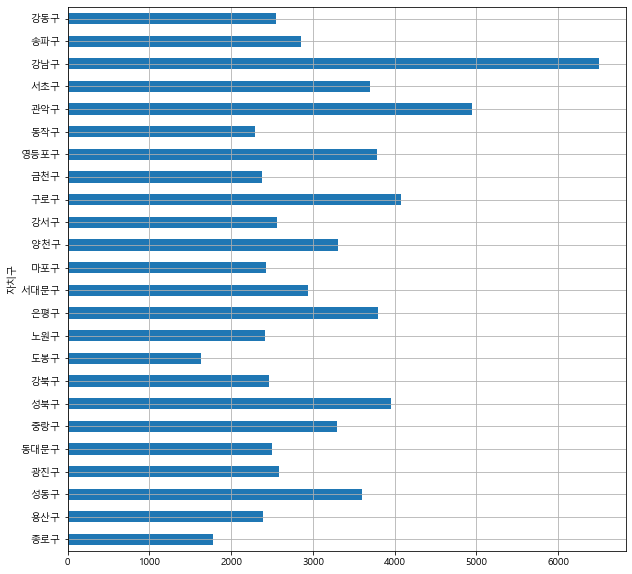

In [103]:
# 3. CCTV와 인구 현황을 그래프로 분석하기
plt.figure()

data_result['CCTV 소계'].plot(kind = 'barh', grid = True, figsize = (10, 10))
plt.show()

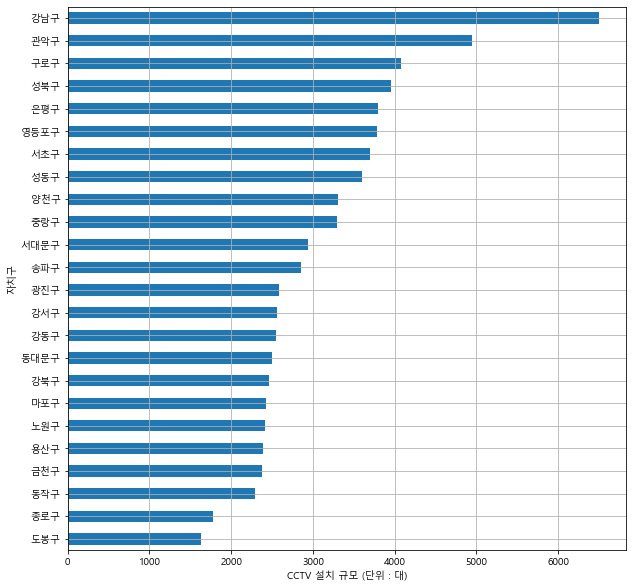

In [104]:
data_result['CCTV 소계'] \
    .sort_values(ascending = True) \
    .plot(kind = 'barh', grid = True, figsize = (10, 10))
plt.xlabel('CCTV 설치 규모 (단위 : 대)')
plt.show()

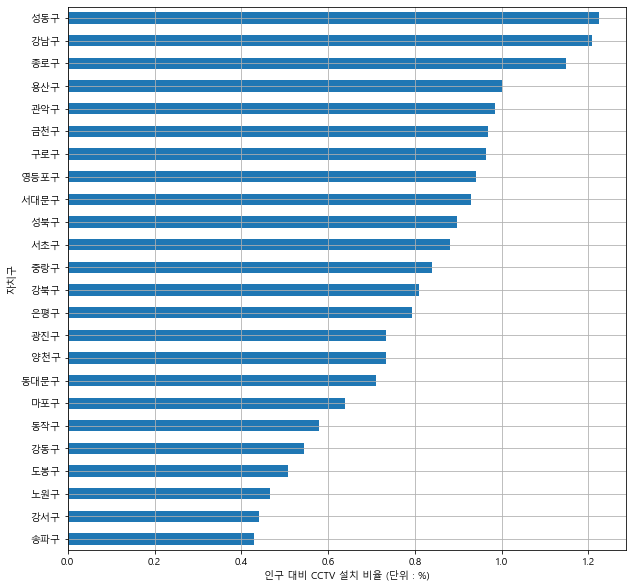

In [105]:
data_result['CCTV 비율'] = data_result['CCTV 소계'] / data_result ['인구수'] * 100

data_result ['CCTV 비율'] \
    .sort_values(ascending = True) \
    .plot(kind = 'barh', grid = True, figsize = (10, 10))
plt.xlabel('인구 대비 CCTV 설치 비율 (단위 : %)')
plt.show()

In [106]:
data_result.sort_values(by= 'CCTV 비율', ascending = True, inplace = True)

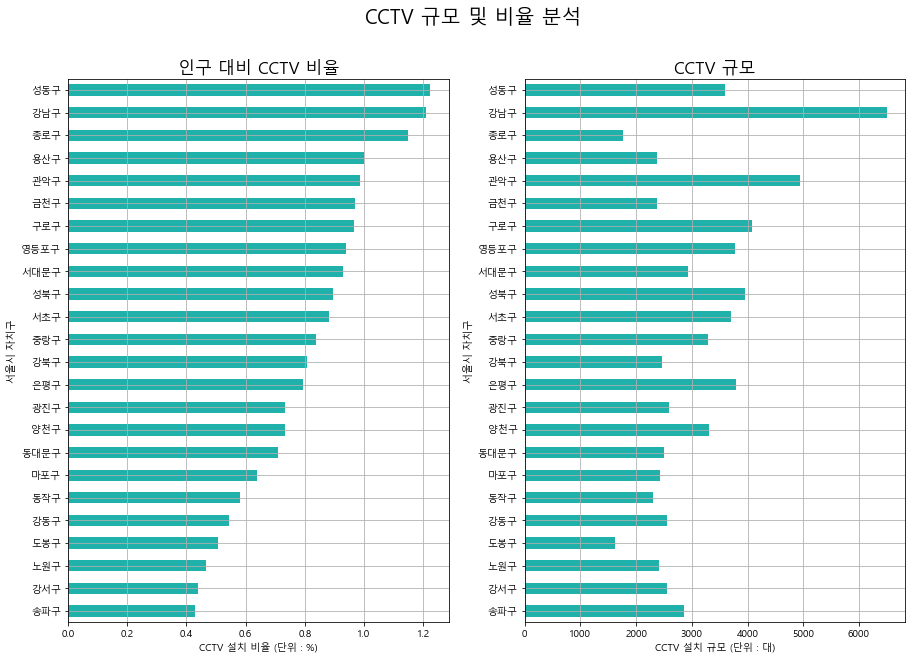

In [107]:
fig = plt.figure(figsize = (15, 10))
fig.suptitle('CCTV 규모 및 비율 분석', fontsize = 20)

ax1 = fig.add_subplot(121)
ax1.set_title('인구 대비 CCTV 비율', fontsize = 17)
data_result['CCTV 비율'] \
    .plot(kind = 'barh', grid = True, color = 'lightseagreen')
plt.xlabel('CCTV 설치 비율 (단위 : %)')
plt.ylabel('서울시 자치구')

ax2 = fig.add_subplot(122)
ax2.set_title('CCTV 규모', fontsize = 17)
data_result['CCTV 소계'] \
    .plot(kind = 'barh', grid = True, color = 'lightseagreen')
plt.xlabel('CCTV 설치 규모 (단위 : 대)')
plt.ylabel('서울시 자치구')

plt.show()

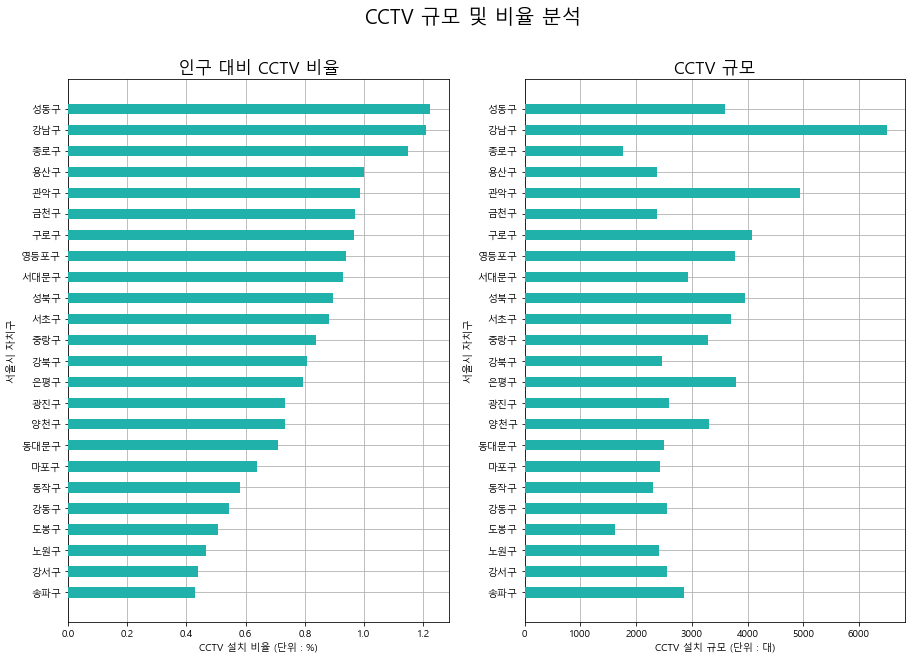

In [108]:
fig = plt.figure(figsize = (15, 10))
fig.suptitle('CCTV 규모 및 비율 분석', fontsize = 20)

ax1 = fig.add_subplot(121)
ax1.set_title('인구 대비 CCTV 비율', fontsize = 17)
ax1.grid(zorder = 0)
plt.barh( y = data_result.index, width = data_result['CCTV 비율'],
        height = 0.5, zorder = 3, color = 'lightseagreen')
plt.xlabel('CCTV 설치 비율 (단위 : %)')
plt.ylabel('서울시 자치구')

ax2 = fig.add_subplot(122)
ax2.set_title('CCTV 규모', fontsize = 17)
ax2.grid(zorder = 0)
plt.barh( y = data_result.index, width = data_result['CCTV 소계'],
        height = 0.5, zorder = 3, color = 'lightseagreen')
plt.xlabel('CCTV 설치 규모 (단위 : 대)')
plt.ylabel('서울시 자치구')

plt.show()

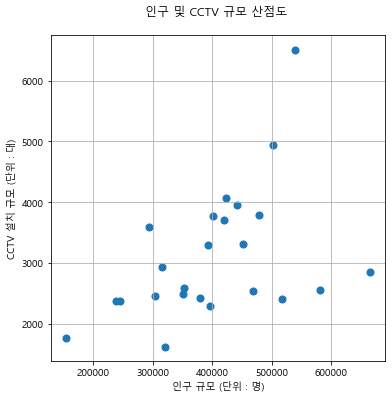

In [109]:
plt.figure(figsize = (6, 6))

plt.scatter(data_result['인구수'],
           data_result['CCTV 소계'],
           s= 50)
plt.title('인구 및 CCTV 규모 산점도 \n')
plt.xlabel('인구 규모 (단위 : 명)')
plt.ylabel('CCTV 설치 규모 (단위 : 대)')
plt.grid()
plt.show()

In [110]:
pf = np.polyfit(data_result['인구수'],
               data_result['CCTV 소계'],
               1)
pf

array([4.08777791e-03, 1.47156876e+03])

In [111]:
fy = np.poly1d(pf)
fy

poly1d([4.08777791e-03, 1.47156876e+03])

In [112]:
fx = np.linspace(100000, 700000, 100)
fx

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242, 130303.03030303, 136363.63636364, 142424.24242424,
       148484.84848485, 154545.45454545, 160606.06060606, 166666.66666667,
       172727.27272727, 178787.87878788, 184848.48484848, 190909.09090909,
       196969.6969697 , 203030.3030303 , 209090.90909091, 215151.51515152,
       221212.12121212, 227272.72727273, 233333.33333333, 239393.93939394,
       245454.54545455, 251515.15151515, 257575.75757576, 263636.36363636,
       269696.96969697, 275757.57575758, 281818.18181818, 287878.78787879,
       293939.39393939, 300000.        , 306060.60606061, 312121.21212121,
       318181.81818182, 324242.42424242, 330303.03030303, 336363.63636364,
       342424.24242424, 348484.84848485, 354545.45454545, 360606.06060606,
       366666.66666667, 372727.27272727, 378787.87878788, 384848.48484848,
       390909.09090909, 396969.6969697 , 403030.3030303 , 409090.90909091,
       415151.51515152, 4

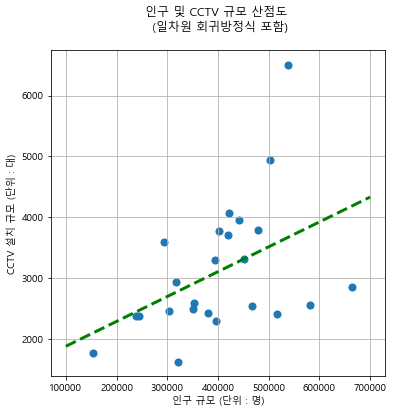

In [113]:
plt.figure(figsize = (6, 6))
plt.scatter(data_result['인구수'],
           data_result['CCTV 소계'],
           s= 50)
plt.plot(fx, fy(fx), ls = 'dashed', lw = 3, color = 'g')
plt.title('인구 및 CCTV 규모 산점도 \n (일차원 회귀방정식 포함)\n')
plt.xlabel('인구 규모 (단위 : 명)')
plt.ylabel('CCTV 설치 규모 (단위 : 대)')
plt.grid()
plt.show()

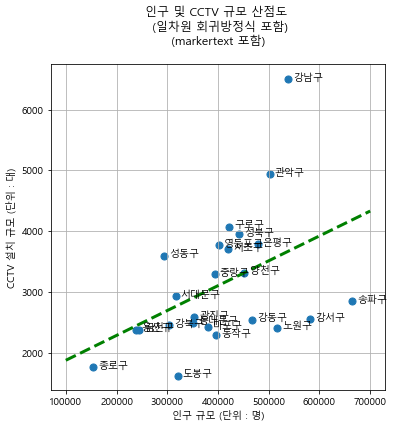

In [114]:
plt.figure(figsize = (6, 6))
# 산점도
plt.scatter(data_result['인구수'],
           data_result['CCTV 소계'],
           s= 50)
# 추정선
plt.plot(fx, fy(fx), ls = 'dashed', lw = 3, color = 'g')

for n in range(len(data_result)):
    plt.text(data_result['인구수'][n] + 10000,
            data_result['CCTV 소계'][n] - 20,
            data_result.index[n],
            fontsize = 10)

plt.title('인구 및 CCTV 규모 산점도 \n (일차원 회귀방정식 포함)\n (markertext 포함) \n')
plt.xlabel('인구 규모 (단위 : 명)')
plt.ylabel('CCTV 설치 규모 (단위 : 대)')
plt.grid()
plt.show()

In [115]:
data_result['오차'] = np.abs(
    data_result['CCTV 소계'] - fy(data_result['인구수'])
)

df_sort = data_result.sort_values(by= '오차', ascending = False)
df_sort.head()

,CCTV 소계,CCTV 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV 비율,오차
자치구,,,,,,,,,,
강남구,6502.0,36.906030,538075.0,533359.0,4716.0,77222.0,0.876458,14.351531,1.208382,2830.900147
관악구,4942.0,26.929260,501572.0,488029.0,13543.0,79444.0,2.700111,15.839002,0.985302,1420.116304
송파구,2854.0,101.079914,664996.0,659385.0,5611.0,96453.0,0.843764,14.504298,0.429176,1335.924713
강서구,2560.0,62.608696,581265.0,575875.0,5390.0,91505.0,0.927288,15.742389,0.440419,1287.650981
노원구,2415.0,53.713528,517038.0,513053.0,3985.0,87537.0,0.770736,16.930477,0.467084,1170.105269


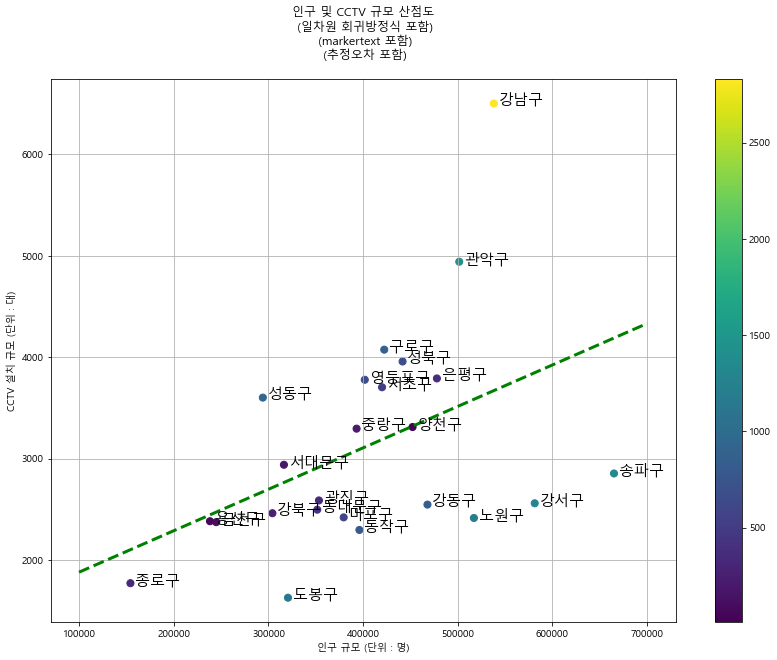

In [116]:
plt.figure(figsize=(14, 10))

# 산점도
plt.scatter(df_sort['인구수'],
            df_sort['CCTV 소계'],
            c = df_sort['오차'],
            s= 50)
# 추세선
plt.plot(fx, fy(fx), ls = 'dashed', lw = 3, color = 'g')

for n in range(len(data_result)):
    plt.text(df_sort['인구수'][n] + 5000,
            df_sort['CCTV 소계'][n] - 20,
            df_sort.index[n],
            fontsize = 15)
    
plt.colorbar()

plt.title('인구 및 CCTV 규모 산점도\n (일차원 회귀방정식 포함)\n (markertext 포함)\n (추정오차 포함)\n')
plt.xlabel('인구 규모 (단위 : 명)')
plt.ylabel('CCTV 설치 규모 (단위 : 대)')
plt.grid()
plt.show()

In [121]:
import pandas as pd
df_sort.to_csv('CCTV_result_2.csv', encoding='UTF-8')